In [1]:
#import pybel
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
import matplotlib
import tdc
from tdc.chem_utils.featurize.molconvert import MoleculeFingerprint
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
datfile = pd.read_csv('../data/secondary-screen-replicate-treatment-info.csv')[['name', 'smiles']].drop_duplicates()
datfile

,name,smiles
0,ribociclib,CN(C)C(=O)c1cc2cnc(Nc3ccc(cn3)N3CCNCC3)nc2n1C1...
1,bortezomib,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...
2,linifanib,Cc1ccc(F)c(NC(=O)Nc2ccc(cc2)-c2cccc3[nH]nc(N)c...
3,dovitinib,CN1CCN(CC1)c1ccc2nc([nH]c2c1)-c1c(N)c2c(F)cccc...
4,canertinib,Fc1ccc(Nc2ncnc3cc(OCCCN4CCOCC4)c(NC(=O)C=C)cc2...
...,...,...
48545,PI3K-IN-2,Nc1cc(c(cn1)-c1nc(nc(n1)N1CCOCC1)N1CCOCC1)C(F)...
48549,verubulin,"COc1ccc(cc1)N(C)c1nc(C)nc2ccccc12, COc1ccc(cc1..."
48551,VE-822,CNCc1ccc(cc1)-c1cc(on1)-c1nc(cnc1N)-c1ccc(cc1)...
48919,fenretinide,CC(/C=C/C1=C(C)CCCC1(C)C)=C\C=C\C(C)=C\C(=O)Nc...


In [3]:
relevant_names = ['poziotinib', 'dacomitinib', 'trametinib', 'cobimetinib', 'ibrutinib', 'vincristine', 'idasanutlin',
                 'uprosertib', 'taselisib', 'volasertib']
relevant_names_frame = pd.DataFrame({'name': relevant_names, 'key':1})
relevant_drugs = relevant_names_frame.merge(datfile[np.isin(datfile['name'], relevant_names)])
relevant_drugs

,name,key,smiles
0,poziotinib,1,COc1cc2ncnc(Nc3ccc(Cl)c(Cl)c3F)c2cc1OC1CCN(CC1...
1,dacomitinib,1,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)\C=C\C...
2,trametinib,1,CC(=O)Nc1cccc(c1)-n1c2c(C)c(=O)n(C)c(Nc3ccc(I)...
3,cobimetinib,1,OC1(CN(C1)C(=O)c1ccc(F)c(F)c1Nc1ccc(I)cc1F)[C@...
4,ibrutinib,1,Nc1ncnc2n(nc(-c3ccc(Oc4ccccc4)cc3)c12)[C@@H]1C...
5,vincristine,1,CC[C@]1(O)C[C@@H]2C[N@](C1)CCc1c([nH]c3ccccc13...
6,idasanutlin,1,COc1cc(ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@...
7,uprosertib,1,Cn1ncc(Cl)c1-c1cc(oc1Cl)C(=O)N[C@H](CN)Cc1ccc(...
8,taselisib,1,CC(C)n1nc(C)nc1-c1cn2CCOc3cc(ccc3-c2n1)-c1cnn(...
9,volasertib,1,CC[C@H]1N(C(C)C)c2nc(Nc3ccc(cc3OC)C(=O)N[C@H]3...


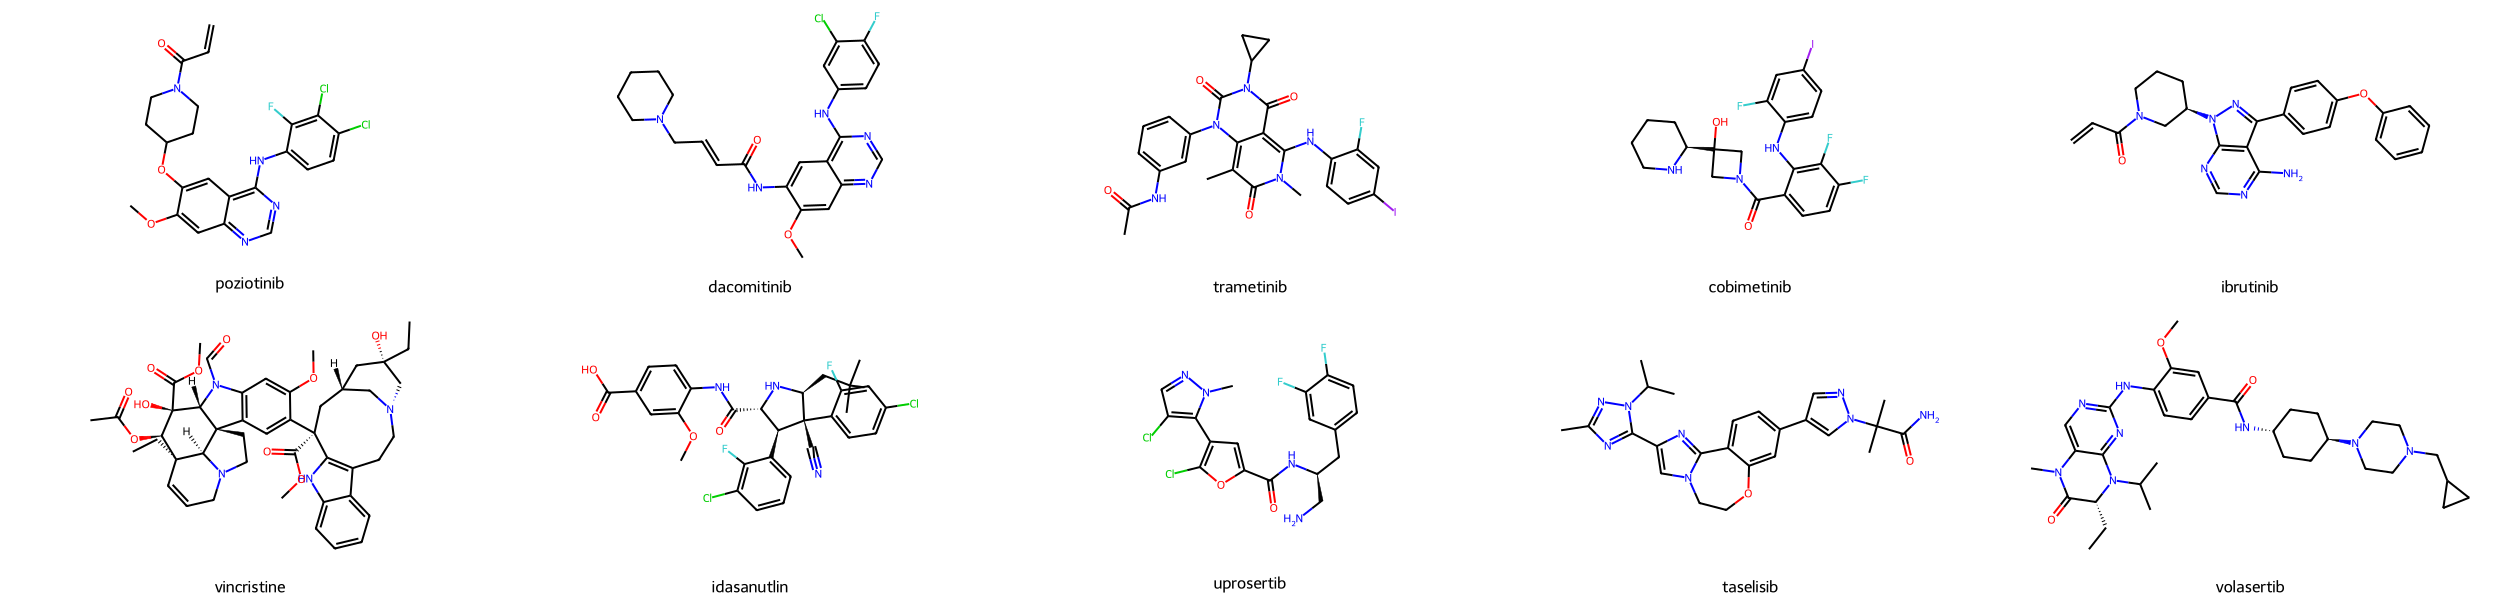

In [4]:
molSize = (300,300)
#matplotlib.rcParams.update({'font.size': })
m_list = [Chem.MolFromSmiles(sm.split(',')[0]) for sm in relevant_drugs['smiles']]
    #m.Draw()
    #drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    #drawer.DrawMolecule(m)
    #drawer.FinishDrawing()

img = Draw.MolsToGridImage(m_list, subImgSize=(500,300), molsPerRow=5, legends  = [name for name in relevant_drugs['name']])
img
#plt.imsave('./plots_statistics/figures/molecules.png', img)

In [5]:
sm = datfile['smiles']
smstr = sm[1]
smstr

'CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O, CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O, CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O, CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O, CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O'

In [6]:
MC = MoleculeFingerprint(fp='ECFP4')
smstr.split(',')[0]

'CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O'

In [7]:
MC(smstr.split(',')[0])

array([0., 1., 0., ..., 0., 0., 0.])

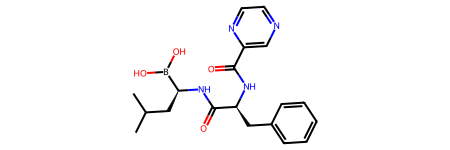

In [8]:
Chem.MolFromSmiles(smstr.split(',')[0])

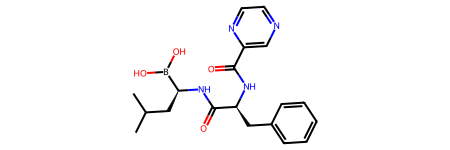

In [9]:
m = Chem.MolFromSmiles(smstr.split(',')[0])
m

In [10]:
def ECFP_from_smiles(smiles,
                     R = 3,
                     L = 2**10,
                     use_features = False,
                     use_chirality = False):
    """
    Inputs:
    
    - smiles ... SMILES string of input compound
    - R ... maximum radius of circular substructures
    - L ... fingerprint-length
    - use_features ... if false then use standard DAYLIGHT atom features, if true then use pharmacophoric atom features
    - use_chirality ... if true then append tetrahedral chirality flags to atom features
    
    Outputs:
    - np.array(feature_list) ... ECFP with length L and maximum radius R
    """
    
    molecule = AllChem.MolFromSmiles(smiles)
    feature_list = AllChem.GetMorganFingerprintAsBitVect(molecule,
                                                                       radius = R,
                                                                       nBits = L,
                                                                       useFeatures = use_features,
                                                                       useChirality = use_chirality)
    return np.array(feature_list)

In [16]:
def get_ecfp(smiles):    
    #if not type(smiles)==str:
    #    print('LOSS')
    #else:
    #    print('go')
        
    result = np.array(ECFP_from_smiles(smiles.split(',')[0])) if type(smiles) == str else None

    return pd.DataFrame(result).transpose()
    

def get_ecfp_frame(name, smile):
    ecfp_frame = get_ecfp(smile)
    ecfp_frame.index = [name]
    return ecfp_frame

In [17]:
ecfp_list =  [get_ecfp_frame(datfile.iloc[i,0], datfile.iloc[i,1]) for i in range(datfile.shape[0])]

go
go
go
go
go
go
LOSS
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go

In [40]:
np.array([a.shape[1]!=1024 for a in ecfp_list]).sum()

1

In [41]:
ecfp_frame = pd.concat(ecfp_list, axis=0)

In [42]:
ecfp_frame = ecfp_frame[np.all(~np.isnan(ecfp_frame), axis=1)]

In [43]:
#ecfp_frame.to_csv('./results/ECFP.csv')
ecfp_frame

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
ribociclib,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
bortezomib,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
linifanib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dovitinib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
canertinib,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PI3K-IN-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
verubulin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VE-822,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fenretinide,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
svd_frame = ecfp_frame # pd.DataFrame(TruncatedSVD(n_components=50).fit_transform(ecfp_frame), index = ecfp_frame.index)
svd_frame.index = svd_frame.index.str.upper()
svd_frame.to_csv('../use_data/ECFP.csv')
svd_frame

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
RIBOCICLIB,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
BORTEZOMIB,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINIFANIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DOVITINIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CANERTINIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PI3K-IN-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
VERUBULIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VE-822,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FENRETINIDE,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from numpy import dot
from numpy.linalg import norm

def cos(a,b):
    return dot(a, b)/(norm(a)*norm(b))

In [46]:
cos(svd_frame.loc['DABRAFENIB',] ,svd_frame.loc['VEMURAFENIB',])

0.29892826582327087

In [47]:
cos(svd_frame.loc['TEMSIROLIMUS',], svd_frame.loc['EVEROLIMUS',])

0.9163930850641921